#  <span style="color:#3366ff"> <strong> Moteur de Recommandations de films (Arnaud ROUSSEAU) </strong>

# <span style="color:#3366ff"> 29 mai 2018 (Part 1 NonCleanée)

<span style="color:#3366ff"> Ce notebook est dédié au nettoyage de la base de donnée "imdb-5000-movie-dataset", et à la création de nouvelles bases de données exploitables (numériques ou alphanumériques).

### Importation des librairies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from collections import Counter

## Chargement de la base et description

In [2]:
data_films_raw = pd.read_csv(
    'DATA/movie_metadata.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

In [3]:
shape = data_films_raw.shape

print("Cette base de données contient",shape[0], 
      "films décrits avec", shape[1], "paramètres (dont cases vides).")

Cette base de données contient 5043 films décrits avec 28 paramètres (dont cases vides).


In [4]:
pd.options.display.max_columns=999
data_films_raw.head(10).T

,0,1,2,3,4,5,6,7,8,9
color,Color,Color,Color,Color,NaN,Color,Color,Color,Color,Color
director_name,James Cameron,Gore Verbinski,Sam Mendes,Christopher Nolan,Doug Walker,Andrew Stanton,Sam Raimi,Nathan Greno,Joss Whedon,David Yates
num_critic_for_reviews,723,302,602,813,NaN,462,392,324,635,375
duration,178,169,148,164,NaN,132,156,100,141,153
director_facebook_likes,0,563,0,22000,131,475,0,15,0,282
actor_3_facebook_likes,855,1000,161,23000,NaN,530,4000,284,19000,10000
actor_2_name,Joel David Moore,Orlando Bloom,Rory Kinnear,Christian Bale,Rob Walker,Samantha Morton,James Franco,Donna Murphy,Robert Downey Jr.,Daniel Radcliffe
actor_1_facebook_likes,1000,40000,11000,27000,131,640,24000,799,26000,25000
gross,7.60506e+08,3.09404e+08,2.00074e+08,4.48131e+08,NaN,7.30587e+07,3.3653e+08,2.00807e+08,4.58992e+08,3.01957e+08
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Adventure|Thriller,Action|Thriller,Documentary,Action|Adventure|Sci-Fi,Action|Adventure|Romance,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Action|Adventure|Sci-Fi,Adventure|Family|Fantasy|Mystery


<span style="color:#3366ff"> <strong>Remarque: </strong>    
<span style="color:#3366ff">Il y a un ecart entre l'ordre d'importance du casting décrit par IMDB et la dénomination de ce même casting selon facebook:
    
<span style="color:#3366ff">- Dans le film 'Spectre' (James Bond), l'acteur principal selon facebook n'est pas Daniel CRAIG mais Christoph WALTZ;       
<span style="color:#3366ff">- Dans le film 'The Dark Knight Rises', l'acteur principal selon facebook n'est pas Christian BALE mais Tom HARDY;    
<span style="color:#3366ff">- Dans le film 'John Carter', l'acteur principal selon facebook n'est pas Taylor KITSCH, mais Daryl SABARA.

In [5]:
data_films_raw.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


<span style="color:#3366ff"> <strong>Remarque: </strong> Les valeurs numériques sont assez variées:    
<span style="color:#3366ff">- il y a des valeurs faibles, ex: "num_critic_for_reviews" mini = 1;    
<span style="color:#3366ff">- il y a des valeurs trés élevées, ex: "gross" max = 7.605058e+08

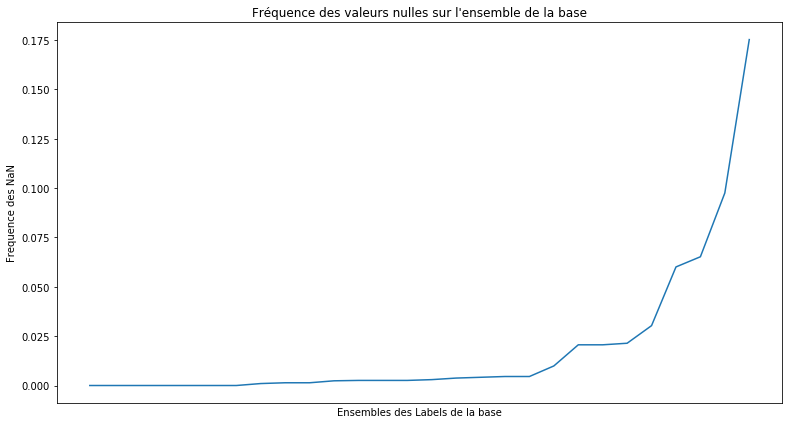

In [6]:
freq_null_raw= data_films_raw.isnull().mean().sort_values()

plt.figure(figsize=(13,7))

ax = plt.subplot()
ax.set_title("Fréquence des valeurs nulles sur l'ensemble de la base")
plt.ylabel("Frequence des NaN")
plt.xlabel("Ensembles des Labels de la base")
plt.xticks([]) 

plt.plot(freq_null_raw)

plt.show()

<span style="color:#3366ff"> La base est pleine (les labels qui tendent vers zéros sont complétés).

## Sélection du des variables Dataframe 

### ... en fonction des données utiles pour le moteur et pour un affichage plus léger

<span style="color:#3366ff"> <strong>Les 28 paramètres de description de ces films sont: </strong>
    
<span style="color:#3366ff">- color  
<span style="color:#3366ff">- director_name  
<span style="color:#3366ff">- num_critic_for_reviews      
<span style="color:#3366ff">- duration  
<span style="color:#3366ff">- director_facebook_likes  
<span style="color:#3366ff">- actor_3_facebook_likes  
<span style="color:#3366ff">- actor_2_name  
<span style="color:#3366ff">- actor_1_facebook_likes  
<span style="color:#3366ff">- gross  
<span style="color:#3366ff">- genres  
<span style="color:#3366ff">- actor_1_name   
<span style="color:#3366ff">- movie_title  
<span style="color:#3366ff">- num_voted_users  
<span style="color:#3366ff">- cast_total_facebook_likes  
<span style="color:#3366ff">- actor_3_name  
<span style="color:#3366ff">- facenumber_in_poster  
<span style="color:#3366ff">- plot_keywords  
<span style="color:#3366ff">- movie_imdb_link  
<span style="color:#3366ff">- num_user_for_reviews  
<span style="color:#3366ff">- language  
<span style="color:#3366ff">- country  
<span style="color:#3366ff">- content_rating  
<span style="color:#3366ff">- budget  
<span style="color:#3366ff">- title_year  
<span style="color:#3366ff">- actor_2_facebook_likes  
<span style="color:#3366ff">- imdb_score  
<span style="color:#3366ff">- aspect_ratio  
<span style="color:#3366ff">- movie_facebook_likes  


<span style="color:#3366ff"> <strong>Remarque: </strong>   
    <span style="color:#3366ff"> Il y a aussi bien des valeurs <strong>numériques</strong> que des valeurs <strong>alpha-numériques</strong> qui ne pourront pas être traitées de la même manière. </span >   


<span style="color:#3366ff"><strong>Remarque: </strong>    
<span style="color:#3366ff">Certaines sont au premier abord inutiles et ne seront pas gardées:    
<span style="color:#3366ff">- budget (non pertinent, pb de devise, pas représentatif du succès, inflation, ...)     
<span style="color:#3366ff">- gross (trop grosses valeurs, non pertinent, pb de devise, pas représentatif du succès, ...)       
<span style="color:#3366ff">- aspect_ratio      
<span style="color:#3366ff">- color      
<span style="color:#3366ff">- duration      
<span style="color:#3366ff">- title_year      
<span style="color:#3366ff">- facenumber_in_poster

In [7]:
# On enlève les colonnes avec des valeurs Nan

data_films_clean = data_films_raw

#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['color']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['director_name']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['num_critic_for_reviews']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['duration']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['director_facebook_likes']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['actor_3_facebook_likes']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['actor_2_name']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['actor_1_facebook_likes']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['genres']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['actor_1_name']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['movie_title']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['num_voted_users']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['cast_total_facebook_likes']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['actor_3_name']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['facenumber_in_poster']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['plot_keywords']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['movie_imdb_link'])  # contient l'ID du film
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['num_user_for_reviews']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['language']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['country']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['content_rating']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['budget']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['title_year']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['actor_2_facebook_likes']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['imdb_score']) 
#data_films_clean = data_films_clean.dropna(axis = 0 , subset=['aspect_ratio']) 
data_films_clean = data_films_clean.dropna(axis = 0 , subset=['movie_facebook_likes']) 

## Création de la base de données "numériques"

<span style="color:#3366ff"> Dans cette phase, seules les valeurs numériques sont conservées.   
    
<span style="color:#3366ff"> Exeption: les "likes facebook" des acteurs 1 2 3 ne seront pas comptabilisés, car il y a un ecart entre l'ordre d'importance du casting décrit par IMDB et la denomination de ce même casting selon facebook. 

In [9]:
data_films_clean_num = data_films_clean_num.set_index('movie_title')

In [10]:
data_films_clean_num_ = data_films_clean_num.drop(['movie_imdb_link'], axis = 1)
data_films_clean_num_.head()

,director_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes
movie_title,,,,,,,
Avatar,0.0,4834,723.0,886204,3054.0,7.9,33000
Pirates of the Caribbean: At World's End,563.0,48350,302.0,471220,1238.0,7.1,0
Spectre,0.0,11700,602.0,275868,994.0,6.8,85000
The Dark Knight Rises,22000.0,106759,813.0,1144337,2701.0,8.5,164000
John Carter,475.0,1873,462.0,212204,738.0,6.6,24000


In [11]:
shape = data_films_clean_num_.shape

print("Cette base de données contient",shape[0], 
      "produits décrits avec", shape[1], "variables numériques.")

Cette base de données contient 4585 produits décrits avec 7 variables numériques.


## Création de la base de données "Alphanumériques"

<span style="color:#3366ff"> Dans cette phase, seules les valeurs alphanumériques sont conservées (sauf les "actor_name" et les variables supprimées au dessus).    

In [12]:
data_films_clean_alph = pd.DataFrame(data_films_clean,
                                columns = [   
'movie_title',      # pour l'identification 
'movie_imdb_link',  # pour l'identification 
'language',
'country',
'genres',
'director_name',
'plot_keywords',
'content_rating'                         
                                          ])

In [13]:
data_films_clean_alph = data_films_clean_alph.set_index('movie_title')

In [14]:
data_films_clean_alph_ = data_films_clean_alph.drop(['movie_imdb_link'], axis=1)
data_films_clean_alph_.head()

,language,country,genres,director_name,plot_keywords,content_rating
movie_title,,,,,,
Avatar,English,USA,Action|Adventure|Fantasy|Sci-Fi,James Cameron,avatar|future|marine|native|paraplegic,PG-13
Pirates of the Caribbean: At World's End,English,USA,Action|Adventure|Fantasy,Gore Verbinski,goddess|marriage ceremony|marriage proposal|pi...,PG-13
Spectre,English,UK,Action|Adventure|Thriller,Sam Mendes,bomb|espionage|sequel|spy|terrorist,PG-13
The Dark Knight Rises,English,USA,Action|Thriller,Christopher Nolan,deception|imprisonment|lawlessness|police offi...,PG-13
John Carter,English,USA,Action|Adventure|Sci-Fi,Andrew Stanton,alien|american civil war|male nipple|mars|prin...,PG-13


In [15]:
shape = data_films_clean_alph_.shape

print("Cette base de données contient",shape[0], 
      "produits décrits avec", shape[1], "variables alphanumériques.")

Cette base de données contient 4585 produits décrits avec 6 variables alphanumériques.


## Description des variables numériques conservées

In [16]:
data_films_clean_num['director_facebook_likes'].describe()

count     4585.000000
mean       730.804362
std       2900.105239
min          0.000000
25%          9.000000
50%         54.000000
75%        213.000000
max      23000.000000
Name: director_facebook_likes, dtype: float64

In [17]:
data_films_clean_num['cast_total_facebook_likes'].describe()

count      4585.000000
mean      10314.762268
std       18007.560919
min           0.000000
25%        1593.000000
50%        3382.000000
75%       14747.000000
max      656730.000000
Name: cast_total_facebook_likes, dtype: float64

In [18]:
data_films_clean['num_critic_for_reviews'].describe()

count    4585.000000
mean      150.725845
std       121.206292
min         1.000000
25%        62.000000
50%       121.000000
75%       206.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [19]:
data_films_clean['num_voted_users'].describe()

count    4.585000e+03
mean     9.111650e+04
std      1.428988e+05
min      2.800000e+01
25%      1.246600e+04
50%      4.117000e+04
75%      1.060720e+05
max      1.689764e+06
Name: num_voted_users, dtype: float64

In [20]:
data_films_clean['num_user_for_reviews'].describe()

count    4585.000000
mean      295.165758
std       387.596607
min         1.000000
25%        84.000000
50%       176.000000
75%       350.000000
max      5060.000000
Name: num_user_for_reviews, dtype: float64

In [21]:
data_films_clean['imdb_score'].describe()

count    4585.000000
mean        6.434111
std         1.098218
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

In [22]:
data_films_clean['movie_facebook_likes'].describe()

count      4585.000000
mean       8126.523446
std       20069.224000
min           0.000000
25%           0.000000
50%         190.000000
75%        8000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

<span style="color:#3366ff"> <strong>Remarque:</strong> il peut y avoir de grands écarts entre les variables -> standardisation.

## Description des variables alphanumériques conservées

In [23]:
data_films_clean_alph_.describe()

,language,country,genres,director_name,plot_keywords,content_rating
count,4585,4585,4585,4585,4585,4585
unique,37,54,851,2109,4463,15
top,English,USA,Drama,Steven Spielberg,based on novel,R
freq,4353,3536,197,26,3,2085


<span style="color:#3366ff"> <strong>Remarque:</strong> La langues Anglaises et les USA sont trés représentés dans cette base de données.

### Description de 'language'

In [24]:
print (Counter(data_films_clean_alph['language']))

Counter({'English': 4353, 'French': 50, 'Spanish': 33, 'Mandarin': 22, 'Hindi': 14, 'German': 14, 'Japanese': 13, 'Cantonese': 8, 'Italian': 8, 'Portuguese': 8, 'Russian': 7, 'Korean': 7, 'Danish': 5, 'Hebrew': 4, 'Norwegian': 4, 'Persian': 4, 'Dutch': 3, 'Thai': 3, 'Aboriginal': 2, 'Dari': 2, 'None': 2, 'Swedish': 2, 'Zulu': 2, 'Indonesian': 2, 'Filipino': 1, 'Maya': 1, 'Kazakh': 1, 'Aramaic': 1, 'Mongolian': 1, 'Bosnian': 1, 'Hungarian': 1, 'Czech': 1, 'Polish': 1, 'Arabic': 1, 'Vietnamese': 1, 'Romanian': 1, 'Greek': 1})


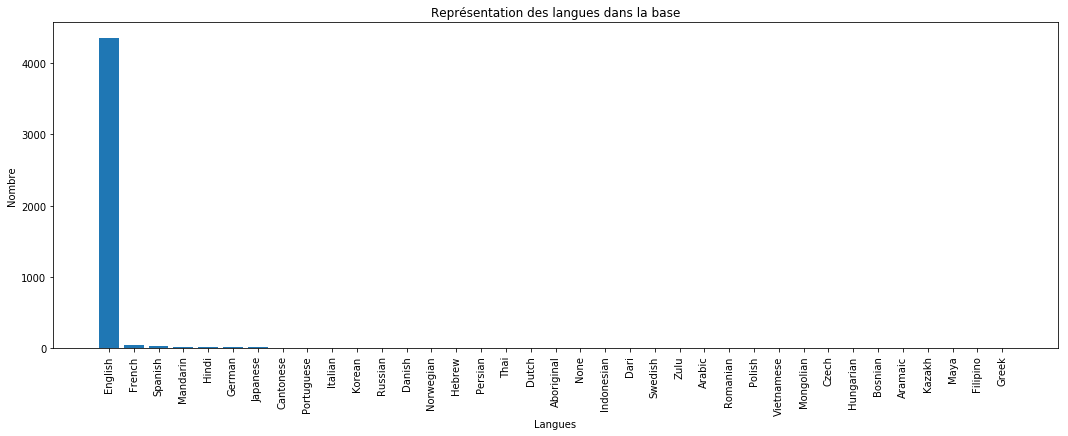

In [25]:
plt.figure(figsize=(18,6))
ax = plt.subplot()
ax.set_title('Représentation des langues dans la base')
plt.xlabel('Langues') 
plt.ylabel("Nombre") 
plt.xticks(rotation='vertical')   

freq_string = Counter(data_films_clean_alph['language'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

plt.bar(freq_string['index'],freq_string[0])
plt.show()

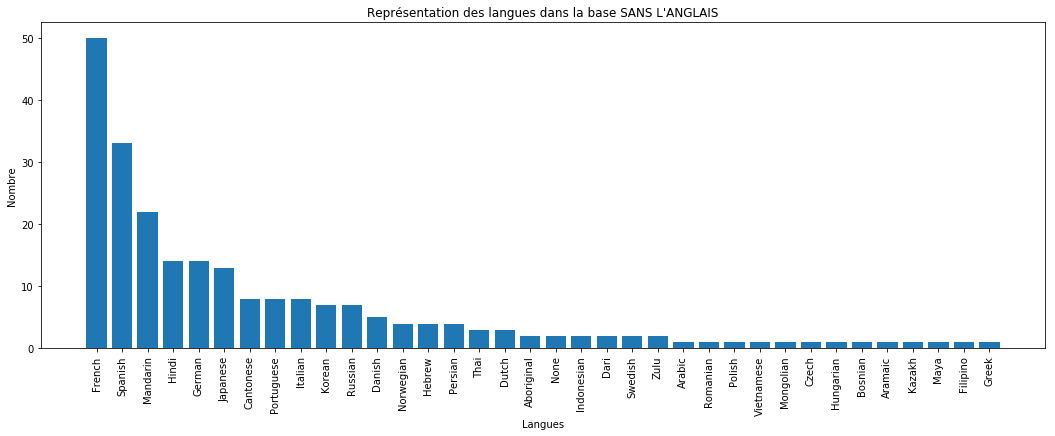

In [26]:
plt.figure(figsize=(18,6))
ax = plt.subplot()
ax.set_title("Représentation des langues dans la base SANS L'ANGLAIS")
plt.xlabel('Langues') 
plt.ylabel("Nombre") 
plt.xticks(rotation='vertical')   

freq_string = Counter(data_films_clean_alph['language'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

freq_string = freq_string.drop([0]) # drop du numéro 1

plt.bar(freq_string['index'],freq_string[0])
plt.show()

<span style="color:#3366ff"> La langue la plus largement représentée est la langue anglaise (plus de 4000 fois).    
<span style="color:#3366ff"> La deuxième langue la mieux représentée est le français, une cinquantaine de fois.   
<span style="color:#3366ff"> Cette variable n'est donc pas très pertinente.  

### Description de 'country'

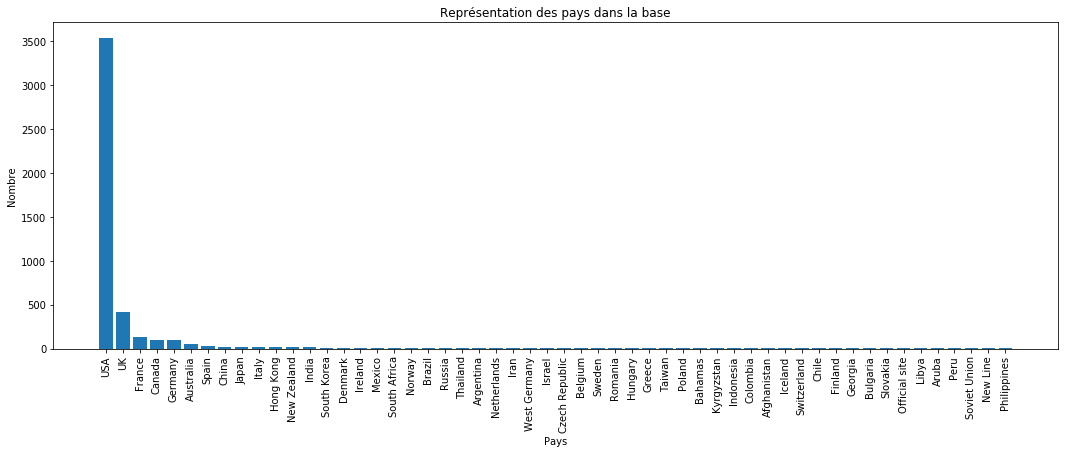

In [27]:
plt.figure(figsize=(18,6))
ax = plt.subplot()
ax.set_title('Représentation des pays dans la base')
plt.xlabel('Pays') 
plt.ylabel("Nombre") 
plt.xticks(rotation='vertical')   

freq_string = Counter(data_films_clean_alph['country'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

plt.bar(freq_string['index'],freq_string[0])
plt.show()

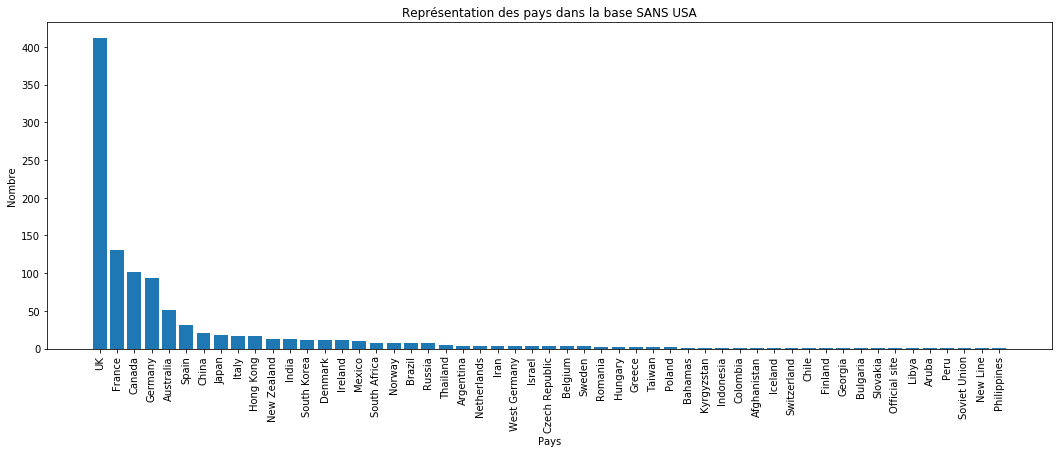

In [28]:
plt.figure(figsize=(18,6))
ax = plt.subplot()
ax.set_title('Représentation des pays dans la base SANS USA')
plt.xlabel('Pays') 
plt.ylabel("Nombre") 
plt.xticks(rotation='vertical')   

freq_string = Counter(data_films_clean_alph['country'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

freq_string = freq_string.drop([0]) # drop du numéro 1

plt.bar(freq_string['index'],freq_string[0])
plt.show()

<span style="color:#3366ff"> Les USA sont les plus représentés dans cette base (plus de 3500 fois).   
<span style="color:#3366ff"> La Grande-Bretagne arrive en second (400 fois).   
<span style="color:#3366ff"> La France arrive en second (+ d'une centaine de fois).       
<span style="color:#3366ff"> Cette variable n'est donc pas très pertinente.  

### Description de 'genres'	

In [29]:
data_films_clean_alph['genres'][0]

'Action|Adventure|Fantasy|Sci-Fi'

<span style="color:#3366ff"> Les variables 'genres' sont concaténées et seront exploitées dans le notebook #3 (analyse des variables alphanumériques).

### Description de 'director_name'

In [30]:
data_films_clean_alph['director_name'].describe()

count                 4585
unique                2109
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

<span style="color:#3366ff"> Sur 4585 films, il y a 2109 réalisateurs différents, dont le plus présent est Steven SPIELBERG. Seront exploitées dans le notebook #3 (analyse des variables alphanumériques).

### Description de 'plot_keywords'

In [31]:
data_films_clean_alph['plot_keywords'][0]

'avatar|future|marine|native|paraplegic'

<span style="color:#3366ff"> Les variables 'plot_keywords' sont concaténés et seront exploités dans le notebook #3 (analyse des variables alphanumériques)

### Description de 'content_rating'

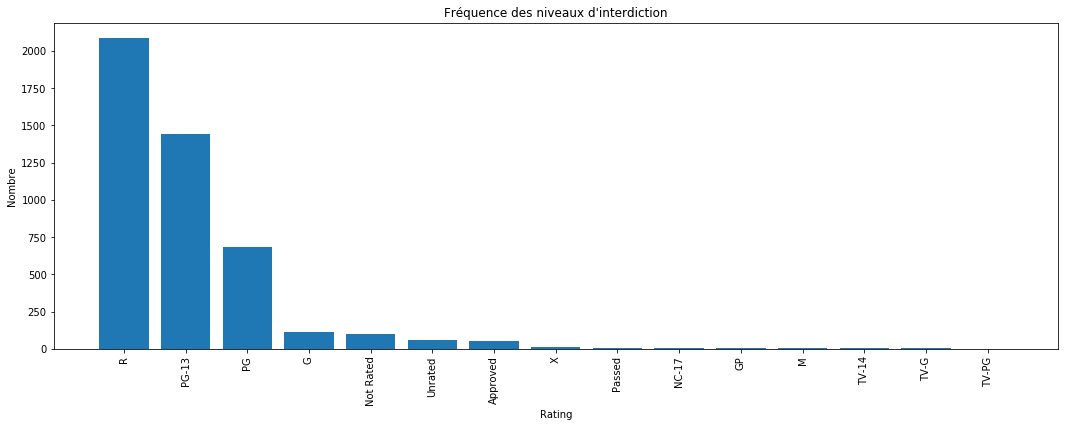

In [32]:
plt.figure(figsize=(18,6))
ax = plt.subplot()
ax.set_title("Fréquence des niveaux d'interdiction")
plt.xlabel('Rating') 
plt.ylabel("Nombre") 
plt.xticks(rotation='vertical')   

freq_string = Counter(data_films_clean_alph['content_rating'])
freq_string = pd.DataFrame.from_dict(freq_string, orient='index').reset_index()
freq_string = freq_string.sort_values(by=[0], ascending=False)

plt.bar(freq_string['index'],freq_string[0])
plt.show()

<span style="color:#3366ff"> Le niveau d'interdiction le plus courant est Rated R. Seront exploitées dans le notebook #3 (analyse des variables alphanumériques).

# Conclusion

<span style="color:#3366ff"> La base de données "imdb-5000-movie-dataset" contient aussi bien des valeurs numériques que des valeurs alpha-numériques qui ne pourront pas être traitées de la même manière.  

<span style="color:#3366ff"> Il y a un ecart entre l'ordre d'importance du casting décrit par IMDB et la dénomination de ce même casting selon facebook. Les "actor_name" et les "likes facebook" des acteurs ne seront pas utilisés.

<span style="color:#3366ff"> Les variables numériques conservées sont:    
<span style="color:#3366ff"> - director_facebook_likes,                              
<span style="color:#3366ff"> - cast_total_facebook_likes,                                     
<span style="color:#3366ff"> - num_critic_for_reviews,       
<span style="color:#3366ff"> - num_voted_users,                                 
<span style="color:#3366ff"> - num_user_for_reviews,     
<span style="color:#3366ff"> - imdb_score,     
<span style="color:#3366ff"> - movie_facebook_likes.      
    
<span style="color:#3366ff"> Les variables alphanumériques conservées sont:  
<span style="color:#3366ff"> - movie_title (=index),    
<span style="color:#3366ff"> - movie_imdb_link (pour l'ID),    
<span style="color:#3366ff"> - genres,        
<span style="color:#3366ff"> - director_names,   
<span style="color:#3366ff"> - plot_keywords,    
<span style="color:#3366ff"> - content_rating.

## Sauvegarde des bases cleanées au format CSV

### Bases cleanée de données numériques

In [33]:
data_films_clean_num.to_csv(path_or_buf='DATA/data_films_clean_num.csv',
                 encoding='Latin_1',       
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='movie_title',
                 )

# la nouvelle base mesure:
shape = data_films_clean_num_.shape

print("La base de données 'data_films_clean_num' contient",shape[0], 
      "films décrits avec", shape[1], "paramètres numériques.")

La base de données 'data_films_clean_num' contient 4585 films décrits avec 7 paramètres numériques.


### Bases cleanée de données alphanumériques

In [34]:
data_films_clean_alph = pd.DataFrame(data_films_clean,
                                columns = [   
'movie_title', 
'movie_imdb_link', # pour l'ID                                
'genres',
'director_name',
'plot_keywords',
'content_rating'                                
                                ])

data_films_clean_alph = data_films_clean_alph.set_index('movie_title')

data_films_clean_alph.to_csv(path_or_buf='DATA/data_films_clean_alph.csv',
                 encoding='Latin_1',       
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='movie_title',
                 )

# la nouvelle base mesure:
shape = data_films_clean_alph.shape

print("La base de données 'data_films_clean_alph' contient",shape[0], 
      "films décrits avec", shape[1]-1, "paramètres alphanumériques.")

La base de données 'data_films_clean_alph' contient 4585 films décrits avec 4 paramètres alphanumériques.
